https://github.com/storopoli/topic-modelling

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5    

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

https://methods.sagepub.com/base/download/DatasetHowToGuide/latent-dirichlet-allocation-in-news-2016-python

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

In [2]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [3]:
def file_reader(file):
    pages = p.PdfFileReader(file)
    p_numbers = pages.getNumPages()
    text = ""
    
    for p_number in range(p_numbers):
        page = pages.getPage(p_number)
        text += page.extractText()
        
    return text

In [4]:
import PyPDF2 as p

text_HCRIOM = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/HCR IOM/HCR_IOM_result.pdf")



In [5]:
text_HCRIOM.lower()

'global \ntrendsforced displacement\n in 20192019 in review\ntrends at a glance\nat the end of 2019 as a result of persecution, con˜ict, \nviolence, human rights violations or events seriously \n\ndisturbing public order.\n79.5 \nmillion\nforcibly displaced worldwide\n107,800\nrefugees \nresettled\nunhcr submitted 81,600 refugees \nto states for resettlement. \n\naccording to government statistics, \n\n26 countries admitted 107,800 \n\nrefugees for resettlement during \n the year, with or without unhcr™s \n\nassistance.\n40%\n children\nan estimated 30 ˜ 34 million of  \n\nthe 79.5 million forcibly displaced \n\npersons were children below \n \n18 years of age.\n5.6\n million\n displaced people \nreturned \n5.6 million displaced people \n\nreturned to their areas or countries \n\nof origin, including 5.3 million \n\ninternally displaced persons and \n\n317,200 refugees. \n2.0\n million\n new claims\nasylum-seekers submitted 2.0 million \n\nnew claims. the united states of \n\namerica w

In [6]:
type(text_HCRIOM)

str

In [7]:
import spacy
from nltk.corpus import stopwords
sp = spacy.load('en_core_web_sm')

#stopwords = sp.Defaults.stop_words
#stopwords.words('english') + ('though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc','sa','igo','2019','2018')

from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc',
 'sa','igo','2019','2018','(',')','©Shutterstock/Valeriya','Anufriyeva','//creativecommons.org/licenses/by-nc-sa/3.0/igo','BY-NC-SA', 
'xACKNOWLEDGEMENTS', 'iii','%', '<',  '>', '*', 'n.r','insecurityTotalTotalTotalTotalTotal47.648.328.58.78.58.0|','//iresearch.worldbank.org/PovcalNet/home.aspx',
                                       'ii', 'viiMETHODOLOGY' ]



In [9]:
type(text_HCRIOM)

str

In [10]:
Sent = nltk.word_tokenize(text_HCRIOM)
print(nltk.pos_tag(Sent))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
sent1 = nltk.pos_tag(Sent)

In [12]:
sent1[:30]

[('GLOBAL', 'NNP'),
 ('TRENDSFORCED', 'NNP'),
 ('DISPLACEMENT', 'NNP'),
 ('IN', 'NNP'),
 ('20192019', 'CD'),
 ('IN', 'NNP'),
 ('REVIEW', 'NNP'),
 ('Trends', 'NNP'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('Glance', 'NN'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('end', 'NN'),
 ('of', 'IN'),
 ('2019', 'CD'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('result', 'NN'),
 ('of', 'IN'),
 ('persecution', 'NN'),
 (',', ','),
 ('con˜ict', 'NN'),
 (',', ','),
 ('violence', 'NN'),
 (',', ','),
 ('human', 'JJ'),
 ('rights', 'NNS'),
 ('violations', 'NNS'),
 ('or', 'CC')]

In [13]:
nouns=[]
nouns = [word for (word, pos) in sent1 if (pos == 'NN' or pos == 'NNS')] 

In [14]:
nouns

['Glance',
 'end',
 'result',
 'persecution',
 'con˜ict',
 'violence',
 'rights',
 'violations',
 'events',
 'order',
 'refugees',
 'States',
 'resettlement',
 'government',
 'statistics',
 'countries',
 'refugees',
 'resettlement',
 'year',
 'assistance',
 '%',
 'persons',
 'children',
 'years',
 'age',
 'people',
 'areas',
 'countries',
 'origin',
 'persons',
 'refugees',
 'claims',
 'world™s',
 'recipient',
 'applications',
 '%',
 'countries',
 'cent',
 'world™s',
 'refugees',
 'Venezuelans',
 'asylum',
 'cent',
 'total',
 '%',
 'cent',
 'refugees',
 'Venezuelans',
 'countries',
 'countries',
 'origin',
 'refugees',
 'refugees',
 'refugees',
 'mandate',
 'people',
 'asylum-seekers',
 'Venezuelans',
 'populations',
 'island',
 'number',
 'number',
 'refugees',
 'Source',
 'addition',
 'refugees',
 'mandate',
 '%',
 'thirds',
 'cent',
 'refugees',
 'Venezuelans',
 'countries',
 'refugees',
 'seekers',
 'Venezuelans',
 'number',
 'refugees',
 'people',
 'Venezuelans',
 '%',
 '%',
 '˚SO

In [15]:

tokens_without_sw = [word for word in nouns if not word in stoplist]

print(tokens_without_sw)

['Glance', 'end', 'result', 'persecution', 'con˜ict', 'violence', 'rights', 'violations', 'events', 'order', 'refugees', 'States', 'resettlement', 'government', 'statistics', 'countries', 'refugees', 'resettlement', 'year', 'assistance', 'persons', 'children', 'years', 'age', 'people', 'areas', 'countries', 'origin', 'persons', 'refugees', 'claims', 'world™s', 'recipient', 'applications', 'countries', 'cent', 'world™s', 'refugees', 'Venezuelans', 'asylum', 'cent', 'total', 'cent', 'refugees', 'Venezuelans', 'countries', 'countries', 'origin', 'refugees', 'refugees', 'refugees', 'mandate', 'people', 'asylum-seekers', 'Venezuelans', 'populations', 'island', 'number', 'number', 'refugees', 'Source', 'addition', 'refugees', 'mandate', 'thirds', 'cent', 'refugees', 'Venezuelans', 'countries', 'refugees', 'seekers', 'Venezuelans', 'number', 'refugees', 'people', 'Venezuelans', '˚SOURCE', '˚SOURCE', 'population', 'statistics', 'reasons', 'addition', 'ones', 'corrections', 'adjustments', 'resu

In [16]:
# using list comprehension 
listToStr = ' '.join([str(elem) for elem in tokens_without_sw]) 
  
print(listToStr)

Glance end result persecution con˜ict violence rights violations events order refugees States resettlement government statistics countries refugees resettlement year assistance persons children years age people areas countries origin persons refugees claims world™s recipient applications countries cent world™s refugees Venezuelans asylum cent total cent refugees Venezuelans countries countries origin refugees refugees refugees mandate people asylum-seekers Venezuelans populations island number number refugees Source addition refugees mandate thirds cent refugees Venezuelans countries refugees seekers Venezuelans number refugees people Venezuelans ˚SOURCE ˚SOURCE population statistics reasons addition ones corrections adjustments result registration verification exercises deaths births reasons estimates result methodologies access populations changes classification populations refugees camp way dignity kits distribution point camp prospects return con˜ict home refugees insecurity host c

In [17]:
type(listToStr)

str

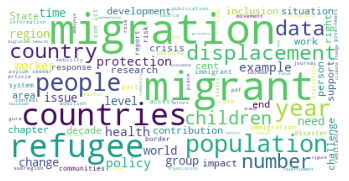

In [18]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(listToStr))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [19]:

tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None,ngram_range=(2,3))
tf = tf_vectorizer.fit_transform(tokens_without_sw)
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,0001 771,0001 771 23710,0024 002494,0024 002494 249459e,002494 249459e,002494 249459e pdf,0082 guinto,00821 18133,00821 18133 256,00b495359529f8673c000000 pdf,...,yemen crisis,young rural,young rural urban,łfamily partner,ˆˆ figure,ˆˇ figure,ﬁpeer reviewﬂ,ﬁsuper diversityﬂ,ﬁvalue addﬂ,ﬁzero tolerance
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(tokens_without_sw)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})


In [21]:
df_ngram.head(10)

,frequency,bigram/trigram
0,88,con ict
1,37,asylum seekers
2,29,bene ts
3,19,reuni cation
4,19,org 10
5,19,iom int
6,18,de nitions
7,18,de nition
8,16,traf cking
9,16,doi org 10


In [22]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [23]:
df_ngram

,frequency,bigram/trigram,polarity,subjective
0,88,con ict,0.0,0.0
1,37,asylum seekers,0.0,0.0
2,29,bene ts,0.0,0.0
3,19,reuni cation,0.0,0.0
4,19,org 10,0.0,0.0
...,...,...,...,...
2547,1,002494 249459e,0.0,0.0
2548,1,0024 002494 249459e,0.0,0.0
2549,1,0024 002494,0.0,0.0
2550,1,0001 771 23710,0.0,0.0


In [24]:
lda_model = LatentDirichletAllocation(n_components=3, learning_method='batch', max_iter=5, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
traf cking un org dif cult org en re ection data estimates2 desa population population migration desa population migration migration data estimates2
Topic 1:
bene ts well being de nition identi cation pro les unhcr org www jstor org jstor org www jstor health care
Topic 2:
con ict asylum seekers reuni cation de nitions iom int org 10 con icts doi org doi org 10 publications iom


In [25]:
import pyLDAvis.sklearn


In [26]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]


PreparedData(topic_coordinates=                 x           y  topics  cluster       Freq
topic                                                     
2      -632.045471 -384.325073       1        1  38.563921
0     -1209.665405  212.164124       2        1  31.166754
1     -1437.453247 -586.322510       3        1  30.269325, topic_info=     Category       Freq            Term      Total  loglift  logprob
947   Default  53.000000         con ict  53.000000  30.0000  30.0000
762   Default  23.000000  asylum seekers  23.000000  29.0000  29.0000
797   Default  16.000000         bene ts  16.000000  28.0000  28.0000
2693  Default  15.000000      well being  15.000000  27.0000  27.0000
1037  Default  10.000000       de nition  10.000000  26.0000  26.0000
...       ...        ...             ...        ...      ...      ...
803    Topic3   2.479404          bit ly   3.998321   0.7172  -6.1957
2014   Topic3   3.551512          org en   9.202763   0.2429  -5.8364
1150   Topic3   2.404096      doi org 10  10.108959  -0.2412  -6.2266
1149   Topic3   2.404096         doi org  10.108959  -0.2412  -6.2266
1969   Topic3   2.393590          org 10  11.927528  -0.4110  -6.2310

[141 rows x 6 columns], token_table=      Topic      Freq                           Term
term                                                
59        1  0.830318                        10 1016
65        2  0.858150                        10 1080
647       3  0.705473                    af liations
762       1  0.999830                 asylum seekers
763       1  0.830262  asylum1refugeesasylum seekers
...     ...       ...                            ...
2826      2  0.980795                     www un org
2827      1  0.632898                      www unhcr
2827      3  0.210966                      www unhcr
2828      1  0.632898                  www unhcr org
2828      3  0.210966                  www unhcr org

[124 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])